# Практическая работа №2:  
## Изучение возможности библиотек Python для решения задач цифровой обработки сигналов  

Выполнил студент гр. 9383 Ноздрин Василий. 

## Цель работы  
Практическое применение дискретного преобразования Фурье для анализа речевых сигналов с использованием библиотек языка Python.

## Постановка задачи  

1. Записать речевой сигнал.  
2. Используя дискретное преобразование Фурье (ДПФ) построить траекторию основного тона ($F_0$).  
3. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот.  
4. Построить сонограмму.  


## Выполнение работы

In [ ]:
!pip install plotly

In [1]:
from scipy.io import wavfile
from scipy import signal

import numpy as np
import matplotlib.pyplot as plt
import more_itertools as mit
import plotly.express as px

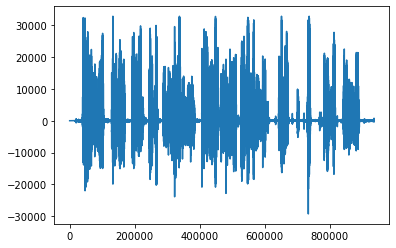

In [2]:
filename = "Recorded_voice.wav"
s_rate, s_data = wavfile.read(filename)
s_time = s_data.size / s_rate
plt.plot(s_data)
plt.show()

## Построение траектории основного тона $F_0$

Частотой основного тона $F_0$ называют частоту вибрации голосовых связок. У каждого говорящего базовая частота основного тона индивидуальна и обусловлена особенностями строения гортани. Частота основного тона различна для мужских и женских голосов и имеют примерный диапазон в 80-200Hz и 160-350Hz соответственно.

In [8]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

In [4]:
N = 2**8
overlap = 0.125
Sr = int(s_rate / N)

In [5]:
#split signal into intervals
intervals = list(mit.windowed(s_data, n=N, step=int(overlap*N)))
intervals[-1] = [i for i in intervals[-1] if i]

In [6]:
#multiply by hamming window
intervals = [interval * np.hamming(len(interval)) for interval in intervals]

In [9]:
#compute DFT for intervals
intervals = [DFT(interval) for interval in intervals]

In [10]:
#compute amplitude spectrum on intervals
amplitude_spectrum = [sum([j**2 for j in interval[:int(len(interval)/2)]])**0.5 for interval in intervals]
amplitude_spectrum = np.array([i.real for i in amplitude_spectrum])

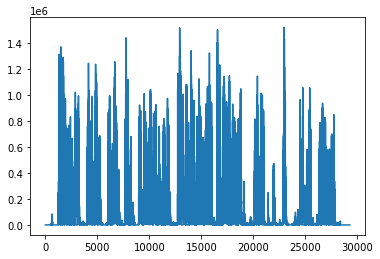

In [11]:
#make generator for arr
def gen_chunks(arr, n):
    for i in range(0, len(arr), n):
        yield arr[i:i + n]

F0 = []
for i in gen_chunks(amplitude_spectrum, Sr):
    segment = np.array(i)
    if segment.max() > segment.mean() * 3:            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]
plt.plot(F0)
plt.show()

## Построение второй, третьей и четвертой формантных частот


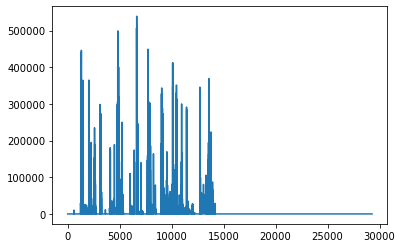

In [12]:
F1 = []
for i in range(len(F0)):
    try:
        max_interv = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
        if F0[i] > max_interv * 2:           
            F1.append(max_interv)
        else:
            F1.append(0)
    except:
        F1.append(0)  
plt.plot(F1)
plt.show()

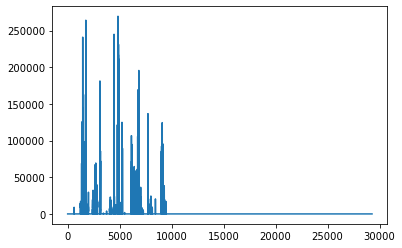

In [13]:
F2 = []
for i in range(len(F0)):
    try:
        max_interv = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
        if F0[i] > max_interv * 4:           
            F2.append([max_interv])
        else:
            F2.append([0])
    except:
        F2.append([0])
plt.plot(F2)
plt.show()

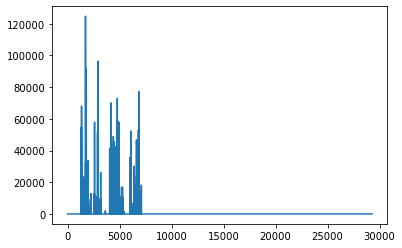

In [14]:
F3 = []
for i in range(len(F0)):
    try:
        max_interv = max([F0[4*i], F0[4*i - 1], F0[4*i + 1]])
        if F0[i] > max_interv * 8:           
            F3.append([max_interv])
        else:
            F3.append([0])
    except:
        F3.append([0])
plt.plot(F3)
plt.show()

## Построение сонограммы  


In [24]:
intervals = list(mit.windowed(amplitude_spectrum, n=round(s_rate/N), step=round(s_rate/N)))
intervals[-1] = [i for i in intervals[-1] if i]
for i in intervals:
    for j in range(len(i)):
        if i[j] > 4e6:
            i[j] = 0
plot_arr = np.array(intervals[:-1], dtype=float)
fig = px.imshow(plot_arr)
fig.show()

## Вывод  

Используя ДПФ были построены первая, вторая, третья и четвёртая траектории основного тона на записи своего голоса. Последние две отсутвуют. Была построена сонограмма по записи своего голоса.